In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd

# The Monty Hall Problem

**Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?**



![](https://drive.google.com/uc?export=view&id=1PEfYQaQJgjdD_vWXnSaC6X9wgn-Bw8um)

## Simultion of the Game

Lets decide how many simulations we want to run. We can call this `n_simulations`.

In [2]:
n_simulations = 1000

This simple simulation conducts `n_simulations` runthroughs of the monte hall problem. The results are stored in `stay_wins` and `switch_wins`.

**Exercise 1.** Write a function called ``pick_door`` that returns a random integer from 1, 2, and 3.

In [9]:
def pick_door():
    choice = None
    # Your solution here
    return choice

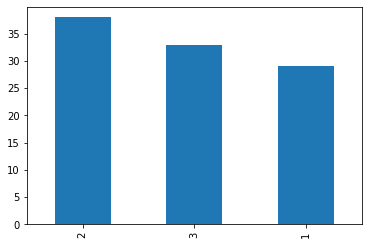

In [18]:
# run this multiple times to make sure it returns only values from 1 to 3
doors = []
for i in range(100):
    doors.append(pick_door())
ax = pd.Series(doors).value_counts().plot.bar()

**Exercise 2.** Write a function called ``return_host_choices`` that returns a list of doors that the host
is allowed to open.

In [10]:
def return_host_choices(guess_door,car_door):
    host_choices = None
    # Your solution here
    return host_choices

In [19]:
return_host_choices(1,1)

[2, 3]

In [20]:
return_host_choices(1,2)

[3]

**Let's put all of this together in a simulation!**

We will run a simulation that:
1. Guesses a door for the contestent - ``guess_door``.
2. Randomly places the car behind a door - ``car_door``.
3. Returns the list of host choices and then select a door for the host to choose that is not the car - ``host_opens``.
4. Determine the door you would switch to IF you wanted to switch - ``switch_door``.

After this is completed, we can check and see if the car door is the guess. If this is the case, then staying with your guess is the correct option. If the switch would have won the car, record that in a list.

In [11]:
stay_wins = 0
switch_wins = 0
result_records = [] # This list keeps track of the results from the simulation
result_columns = ['Chosen Door', 'Open Door', 'Car Door', 'Winner']
for i in range(n_simulations):
    guess_door = pick_door() # We can't do better than randomly guessing with our initial guess
    car_door = pick_door() # The car can be behind door one, two, or three
    host_choices = return_host_choices(guess_door,car_door)
    host_opens = random.choice(host_choices) # This is the door the host chose to open
    switch_door = list(set([1, 2, 3]) - set([guess_door, host_opens]))[0] # This would be your door if you switched

    if car_door == guess_door:
        stay_wins += 1
        winner = 'Stay'
    if car_door == switch_door:
        switch_wins += 1
        winner = 'Switch'
    
    result_records.append((guess_door, host_opens, car_door, winner))


## Results of the Simulation
- The results of the simulation are shows in the table below.
- We can help visualize the outcome with a bar plot


In [21]:
results_df = pd.DataFrame(result_records, columns=result_columns)
results_df

,Chosen Door,Open Door,Car Door,Winner
0,1,2,1,Stay
1,2,3,2,Stay
2,1,3,2,Switch
3,1,3,1,Stay
4,2,1,3,Switch
...,...,...,...,...
995,2,3,2,Stay
996,1,2,1,Stay
997,3,1,3,Stay
998,2,1,3,Switch


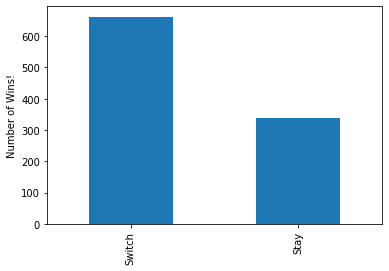

In [24]:
ax = results_df['Winner'].value_counts().plot.bar()
ax.set_ylabel('Number of Wins!');

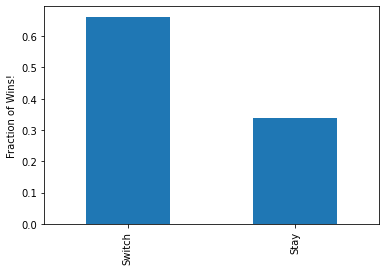

In [28]:
ax = results_df['Winner'].value_counts(normalize=True).plot.bar()
ax.set_ylabel('Fraction of Wins!');